# Minahil Chaudhary
## Week 16 - 12/06/2022
### Python Data Visualization and Cleaning Project - Python Stock Market

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('AMZN-2.csv')

In [4]:
data.head()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon


In [5]:
data.tail()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [6]:
data.tail(-5)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon
...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


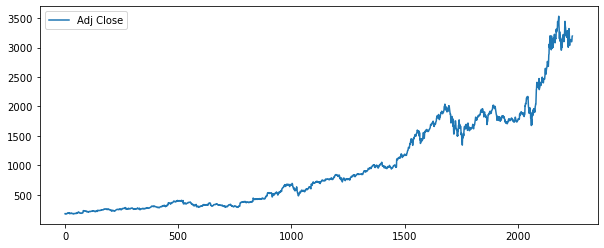

In [8]:
data['Adj Close'].plot(legend=True, figsize = (10,4))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


In [10]:
# count the number o0f numerical and none numerical variables (columns)
from pandas.api.types import is_numeric_dtype
n=0

for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
        
print('numerical values: ', n, 'none numerical values: ', len(data.columns)-n)

numerical values:  6 none numerical values:  3


In [11]:
len(data.columns)

9

In [12]:
# data cleaning  - Preparing data for analytics 
data.isnull()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2237,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False
2239,False,False,False,False,False,False,False,False,False
2240,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [16]:
data['Volume'].min()

0

In [17]:
data['Volume'].max()

23856100

In [18]:
data['Volume'].sort_values(ascending=True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [19]:
data=data[data['Volume']  > 100000]

In [20]:
data['Volume'].sort_values(ascending=True).head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [21]:
data

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon


In [22]:
data.shape

(2228, 9)

In [23]:
# Remove all columns that have a constant or singfle vcalue

constant_columns=[]
for c in data.columns:
    n = len(data[c].unique())
    if n ==1:
        constant_columns.append(c)
        
print('constant columns: ', constant_columns)

constant columns:  ['Source', 'Stock']


In [24]:
data.drop(columns=constant_columns, axis=1, inplace=True)

In [25]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
len(data.columns)

7

In [27]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [28]:
dateObject = pd.DatetimeIndex(data['Date'])
dateObject

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2228, freq=None)

In [29]:
data['Day']= dateObject.day
data['Month']= dateObject.month
data['Year']= dateObject.year

In [30]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,3,1,2012
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,4,1,2012
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,5,1,2012
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,6,1,2012
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,9,1,2012
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,20,11,2020
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,23,11,2020
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,24,11,2020
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,25,11,2020


In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')

In [32]:
data['Volume'] = data['Volume'] /1000

In [33]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,3,1,2012
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,4,1,2012
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,5,1,2012
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,6,1,2012
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,9,1,2012
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,20,11,2020
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,23,11,2020
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,24,11,2020
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,25,11,2020


In [34]:
data['Volume']

0       5110.8
1       4205.2
2       3809.1
3       7008.4
4       5056.9
         ...  
2237    3374.4
2238    4708.9
2239    3602.1
2240    3790.4
2241    2392.9
Name: Volume, Length: 2228, dtype: float64

In [35]:
#Use visualization for data analysis
data[['Year', 'Volume']].groupby('Year').sum()

,Volume
Year,
2012,975492.4
2013,747905.7
2014,1029066.7
2015,957102.0
2016,1038756.3
2017,882705.4
2018,1417897.6
2019,974729.4
2020,1166035.7


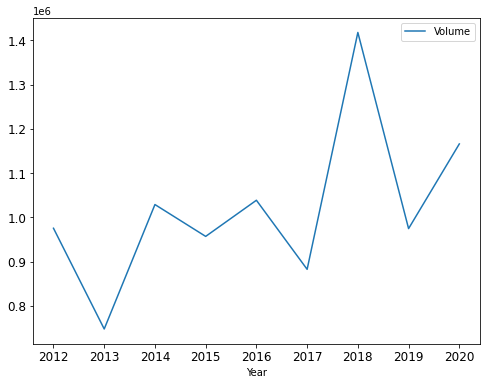

In [37]:
data[['Year', 'Volume']].groupby('Year').sum().plot(figsize=(8,6), y='Volume', fontsize=12)

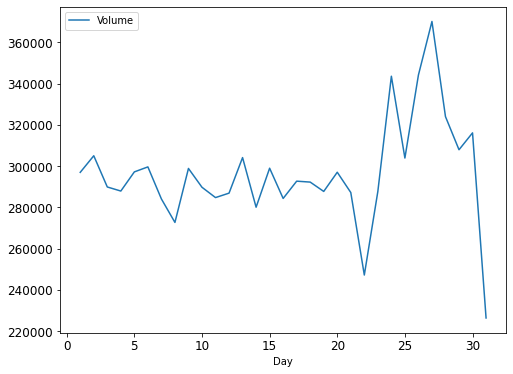

In [38]:
data[['Day', 'Volume']].groupby('Day').sum().plot(figsize=(8,6), y='Volume', fontsize=12)

In [39]:
#Show the closing per date
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')

In [40]:
data['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
2237   2020-11-20
2238   2020-11-23
2239   2020-11-24
2240   2020-11-25
2241   2020-11-27
Name: Date, Length: 2228, dtype: datetime64[ns]

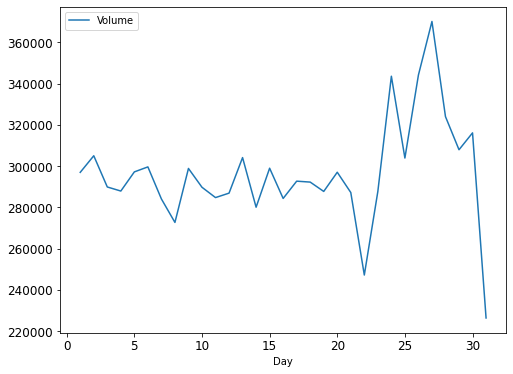

In [41]:
data[['Day', 'Volume']].groupby('Day').sum().plot(figsize=(8,6), y='Volume', fontsize=12)

In [45]:
#using filters
#Adj close prices smaller than open prices  after 2015

filter1 = data[data['Year'] > 2015]

filter1
               
    

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314.5,4,1,2016
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822.6,5,1,2016
1008,2016-01-06,622.000000,639.789978,620.309998,632.650024,632.650024,5329.2,6,1,2016
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074.9,7,1,2016
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512.9,8,1,2016
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,23,11,2020
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,24,11,2020
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,25,11,2020


In [46]:
filter2 = data[data['Adj Close'] < data['Open']]

filter2

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,4,1,2012
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,9,1,2012
5,2012-01-10,181.100006,182.399994,177.100006,179.339996,179.339996,3985.8,10,1,2012
6,2012-01-11,179.639999,180.770004,178.190002,178.899994,178.899994,3102.7,11,1,2012
7,2012-01-12,179.419998,179.490005,175.750000,175.929993,175.929993,5385.8,12,1,2012
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,17,11,2020
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,18,11,2020
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,23,11,2020


In [47]:
len(filter2)

1105

In [48]:
bool_filter1 = data['Year'] > 2015

bool_filter1

0       False
1       False
2       False
3       False
4       False
        ...  
2237     True
2238     True
2239     True
2240     True
2241     True
Name: Year, Length: 2228, dtype: bool

In [49]:
bool_filter2 = data['Adj Close'] < data['Open']
bool_filter2

0       False
1        True
2       False
3       False
4        True
        ...  
2237     True
2238     True
2239    False
2240    False
2241     True
Length: 2228, dtype: bool

In [50]:
result = data[bool_filter1 & bool_filter2]

In [51]:
result

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314.5,4,1,2016
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822.6,5,1,2016
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074.9,7,1,2016
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512.9,8,1,2016
1012,2016-01-12,625.250000,625.989990,612.239990,617.890015,617.890015,4724.1,12,1,2016
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,17,11,2020
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,18,11,2020
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,23,11,2020


In [52]:
result[['Open', 'Adj Close']]

,Open,Adj Close
1006,656.289978,636.989990
1007,646.859985,633.789978
1009,621.799988,607.940002
1010,619.659973,607.049988
1012,625.250000,617.890015
...,...,...
2234,3183.540039,3135.659912
2235,3134.000000,3105.459961
2237,3117.020020,3099.399902
2238,3116.699951,3098.389893


In [53]:
result['Open'].sum() - result ['Adj Close'].sum()

11206.19128899998

In [55]:
result[['Year', 'Adj Close']].groupby('Year').count()

,Adj Close
Year,
2016,127
2017,128
2018,124
2019,125
2020,112


In [56]:
result[['Year', 'Adj Close']].groupby('Year').count()

,Adj Close
Year,
2016,127
2017,128
2018,124
2019,125
2020,112


Text(0, 0.5, 'Number of Stocks')

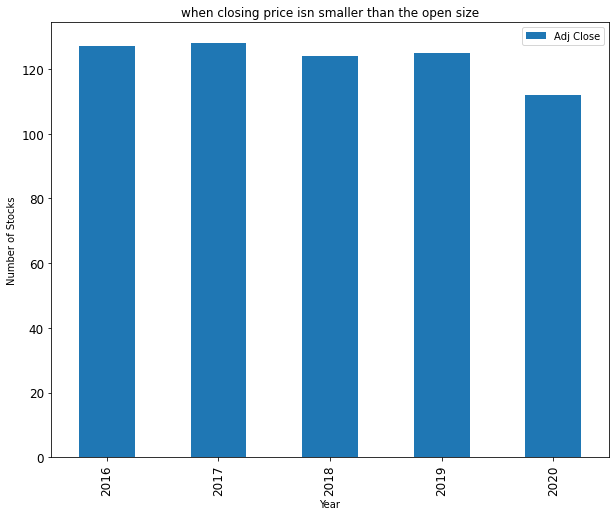

In [58]:
result[['Year', 'Adj Close']].groupby('Year').count().plot.bar(figsize=(10,8), y = 'Adj Close', fontsize=12,legend = True,
                                                              title='when closing price isn smaller than the open size')
plt.ylabel('Number of Stocks')

In [57]:
data[['Month', 'High', 'Low', 'Open', 'Adj Close']].groupby('Month').mean()

,High,Low,Open,Adj Close
Month,,,,
1,845.138624,826.699177,835.785055,837.217747
2,869.500417,848.818237,859.158765,859.137411
3,883.179059,860.221100,871.632875,873.045287
4,935.481024,913.718432,924.956487,925.537783
5,981.422476,964.186472,972.484422,973.608949
6,1030.305523,1010.421686,1020.797158,1020.935264
7,1117.510261,1090.640261,1105.218596,1105.226407
8,1124.288736,1103.972829,1114.122626,1114.643383
9,1137.103572,1110.570271,1126.507582,1123.582474


In [59]:
group1 = data[['Month', 'High', 'Low', 'Open', 'Adj Close']].groupby('Month').mean()

group1

,High,Low,Open,Adj Close
Month,,,,
1,845.138624,826.699177,835.785055,837.217747
2,869.500417,848.818237,859.158765,859.137411
3,883.179059,860.221100,871.632875,873.045287
4,935.481024,913.718432,924.956487,925.537783
5,981.422476,964.186472,972.484422,973.608949
6,1030.305523,1010.421686,1020.797158,1020.935264
7,1117.510261,1090.640261,1105.218596,1105.226407
8,1124.288736,1103.972829,1114.122626,1114.643383
9,1137.103572,1110.570271,1126.507582,1123.582474


Text(0, 0.5, 'Average of stock proices')

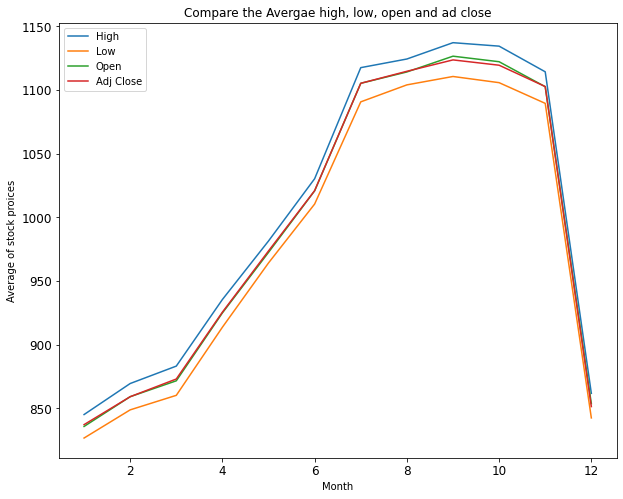

In [62]:
group1.plot(figsize=(10,8), y=['High', 'Low', 'Open', 'Adj Close'],
           fontsize=12, legend = True, title='Compare the Avergae high, low, open and ad close')
plt.ylabel('Average of stock proices')

In [63]:
r = data[['Month', 'Volume']].groupby('Month').sum().astype('int')
r

,Volume
Month,
1,884620
2,846030
3,839584
4,890804
5,693382
6,671267
7,792035
8,633655
9,650017


In [64]:
r.min()

Volume    633655
dtype: int32

In [65]:
r.max()

Volume    897270
dtype: int32

In [66]:
r.idxmin()

Volume    8
dtype: int64

In [67]:
r.idxmax()

Volume    10
dtype: int64

In [68]:
print('The month with the lowest volume', r.idxmin()[0], 'Volume', r.min()[0])

The month with the lowest volume 8 Volume 633655


In [69]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,3,1,2012
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,4,1,2012
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,5,1,2012
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,6,1,2012
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,9,1,2012
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,20,11,2020
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,23,11,2020
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,24,11,2020
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,25,11,2020


In [70]:
r = data[['Date', 'Volume']].groupby('Date').count()

r

,Volume
Date,
2012-01-03,1
2012-01-04,1
2012-01-05,1
2012-01-06,1
2012-01-09,1
...,...
2020-11-20,1
2020-11-23,1
2020-11-24,1


In [72]:
r = data['Volume']
s = r.idxmin()
l = r.idxmax()
print('The row with the lowest volume is ', s)
print('The row with the highest volume is', l)

The row with the lowest volume is  2007
The row with the highest volume is 773


In [74]:
print('The row with the lowest volume', data.iloc[s]['Date'].date(), 'Volume', data.iloc[s]['Volume'])
print('The row with thw highest volume', data.iloc[l]['Date'].date(), 'Volume', data.iloc[l]['Volume'])

The row with the lowest volume 2020-01-15 Volume 2896.6
The row with thw highest volume 2015-02-20 Volume 3258.0


In [76]:
r = data[['Month', 'Day', 'Adj Close']].groupby(['Month', 'Day']).mean()

r

Adj Close
Month Day            
1     2    931.658335
      3    881.009992
      4    769.301659
      5    624.636002
      6    700.508339
...               ...
12    27   988.581681
      28   871.326001
      29   735.157494
      30   797.900000
      31   830.951660

[363 rows x 1 columns]

In [77]:
r.idxmin()

Adj Close    (2, 29)
dtype: object

In [78]:
print('The month and day with the lowest closing price is ', r.idxmin()[0],
     'and the monyth with the highest closing price is ', r.min()[0])

The month and day with the lowest closing price is  (2, 29) and the monyth with the highest closing price is  366.105011


In [82]:
r = data.loc[data['Adj Close'].idxmax()]